In [32]:
#load data
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import linear_model
%matplotlib inline

## Use hand-designed features in general machine learning model

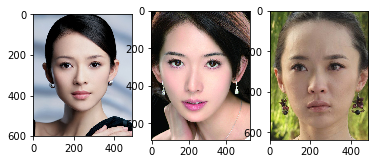

In [155]:
fig,axes = plt.subplots(1,3)
image_candidates = [110, 104, 109]
for i, ax in enumerate(axes.flat):
    ax.imshow(misc.imread('./Data_Collection/SCUT-FBP-' + str(image_candidates[i]) + '.jpg'))

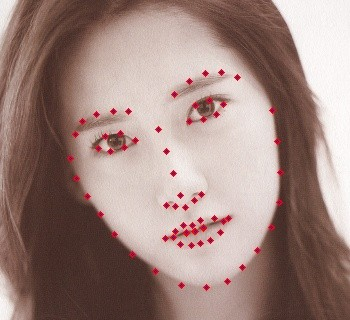

In [5]:
# landmarks = np.loadtxt('./data/landmarks.txt', delimiter=',')
# print landmarks.shape
# print landmarks
Image(filename='landmark.jpg')

In [6]:
features = np.loadtxt('./data/features.txt', delimiter=',')
ratings = np.loadtxt('./data/ratings.txt', delimiter=',')
features_train, features_test, ratings_train, ratings_test = train_test_split(features,ratings, test_size=0.2, random_state=0)

In [12]:
print(features)

[[ 1.0736  1.0444  4.1168 ...,  3.1341  0.9644  1.0793]
 [ 1.0385  1.0271  4.8245 ...,  3.3793  0.9017  1.0563]
 [ 1.0466  1.0283  3.9231 ...,  3.3417  0.8819  1.0623]
 ..., 
 [ 0.9809  0.9895  4.1113 ...,  3.1299  0.8564  1.0504]
 [ 1.0367  1.0219  3.5566 ...,  2.8959  0.8623  1.0753]
 [ 1.0021  1.0031  4.2707 ...,  3.6416  0.8842  1.0484]]


In [13]:
#dimension reduction
pca = decomposition.PCA(n_components=20)
pca.fit(features_train)
features_train = pca.transform(features_train)
features_test = pca.transform(features_test)

In [15]:
#linear regression
l_reg = linear_model.LinearRegression()
l_reg.fit(features_train, ratings_train)
ratings_predict = l_reg.predict(features_test)
print('dimensiona of predicted ratings: ' + str(ratings_predict.shape))
print('predicted rating: ' + str(ratings_predict))

corr = np.corrcoef(ratings_predict, ratings_test)
print ('correlation between human rating and model prediction:')
print (corr)

dimensiona of predicted ratings: (100,)
predicted rating: [ 2.93043904  2.42222881  2.11133062  1.70662018  3.47087157  3.03711145
  2.53089584  2.5067883   2.14779401  2.4418442   3.03587244  2.52944613
  3.63277112  2.20939828  3.01919195  2.46433861  2.2582525   2.54711045
  2.52384534  4.80406833  2.25290932  2.35793749  2.11766426  2.65568975
  3.88876577  2.59920323  2.76151886  2.29045788  3.33585605  2.87456423
  2.74833062  2.44334509  2.88166063  2.51739774  2.62872103  2.50560693
  2.77186312  2.47583757  2.19968235  2.19260745  2.6422789   4.11645111
  2.47953018  2.62626656  3.00989763  2.89661857  2.79359894  2.73258902
  2.41566238  4.02051041  2.58686033  2.05769602  2.61696273  2.73320568
  3.61956043  3.06315976  2.41511112  1.94587326  2.4254014   2.368201
  2.63888572  2.7977784   2.56064219  2.86775842  2.17298854  2.4449709
  2.7370005   2.44719576  2.2421021   2.8579705   2.47489201  2.77617477
  2.33779222  2.62727627  3.34700999  2.54341187  2.79710086  3.56256

## Use deep learning

In [23]:
from scipy import misc
image = Image(filename = './Data_Collection/SCUT-FBP-110.jpg')
image_array = misc.imread('./Data_Collection/SCUT-FBP-110.jpg')

In [45]:
print(image_array.shape)
image_array

(601, 486, 3)


601

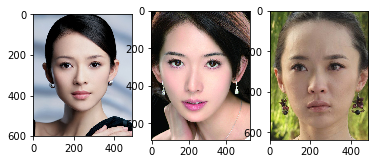

In [157]:
fig,axes = plt.subplots(1,3)
image_candidates = [110, 104, 109]
for i, ax in enumerate(axes.flat):
    ax.imshow(misc.imread('./Data_Collection/SCUT-FBP-' + str(image_candidates[i]) + '.jpg'))

In [36]:
#plt.imshow(image_array)

### Creat data set for training

In [159]:
#not sorted by alphabetical order
#but in numerical order so that 2.jpg will orderbefore 100.jpg
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

file_names = []
for infile in sorted(glob.glob(os.path.join('./Data_Collection/', '*.jpg')), key = numericalSort):
    file_names.append(infile)

images = []
for i, filename in enumerate(file_names):
    image = misc.imresize(misc.imread(filename), (256, 256))
    images.append(misc.imresize(misc.imread(filename), (256, 256)))


C:\Users\ninm\AppData\Local\Continuum\Anaconda2\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


2.6142857142857143

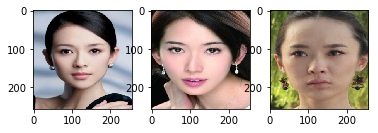

In [158]:
images_array = np.array(images)
fig,axes = plt.subplots(1,3)
image_candidates = [109, 103, 108]
for i, ax in enumerate(axes.flat):
    ax.imshow(images_array[image_candidates[i],:,:,:])

In [ ]:
from sklearn.model_selection import train_test_split
import os
import re
import glob
import pandas as pd

#data class include 'images' and 'labels'
class Data:
    def __init__(self, images, labels):
        #data is n x m array, where 'n' denotes number of samples
        self.images = images
        self.labels = labels
        self.batch_index = 0
    def next_batch(batch_size):
        num_images = len(self.images)
        end_batch_index = min(self.batch_index + batch_size, num_images)
        images_batch = self.images[self.batch_index:end_batch_index,:]
        labels_batch = self.labels[self.batch_index:end_batch_index,:]
        
        if end_batch_index == num_images:
            self.batch_index = 0
        else:
            self.batch_index = end_batch_index
        
        return images_batch, labels_batch


def read_data_sets(data_folder, labels_folder):
    
    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    
    #read image data
    file_names = []
    for infile in sorted(glob.glob(os.path.join('./Data_Collection/', '*.jpg')), key = numericalSort):
        file_names.append(infile)

    images = []
    for i, filename in enumerate(file_names):
        image = misc.imresize(misc.imread(filename), (256, 256))
        images.append(misc.imresize(misc.imread(filename), (256, 256)))
    images_array = np.array(images)
    
    #read label data
    ratings = pd.read_excel('./Rating_Collection/Attractiveness label.xlsx')
    ratings.head()
    labels = np.array(ratings['Attractiveness label'])